In [1]:
%matplotlib inline

## [Adjusted Rand Index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)
- Measures the similarity of two assignments.
- No assumptions required regarding cluster structures.
- Requires knowledge of ground truth classes, which is rarely available.

In [8]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# One can permute 0 and 1 in predicted labels, rename 2 to 3, and get the same score.
labels_pred = [1, 1, 0, 0, 3, 3]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# ARI is symmetric: swapping the argument does not change the score. 
# It can thus be used as a consensus measure.
print(metrics.adjusted_rand_score(labels_pred, labels_true))


0.24242424242424246
0.24242424242424246
0.24242424242424246


- Perfect labeling is scored as 1.0.
- Bad labelings have negative or near-zero scores.

In [6]:
labels_pred = labels_true[:]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

1.0
-0.12903225806451613


## Example

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics

# Compute score for 2 random uniform cluster labelings.
# Both have the same number of clusters for each value
# When fixed_n_classes is not None the first labeling is considered a ground
# truth class assignment with fixed number of classes.

def uniform_labelings_scores(score_func, 
                             n_samples, 
                             n_clusters_range,
                             fixed_n_classes=None, 
                             n_runs=5, 
                             seed=42):
    
    random_labels = np.random.RandomState(seed).randint
    scores        = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, 
                                 high=fixed_n_classes, 
                                 size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, 
                                         high=k, 
                                         size=n_samples)
            labels_b = random_labels(low=0, 
                                     high=k, 
                                     size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores


In [10]:
def ami_score(U, V):
    return metrics.adjusted_mutual_info_score(U, V)

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    ami_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.057s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.077s
Computing ami_score for 10 values of n_clusters and n_samples=100
done in 0.465s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.065s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.068s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.098s
Computing ami_score for 10 values of n_clusters and n_samples=1000
done in 0.313s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.075s


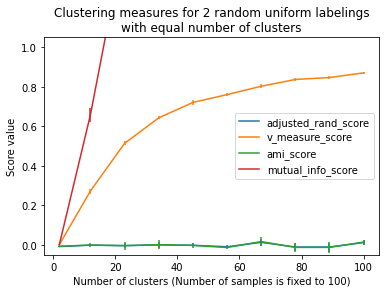

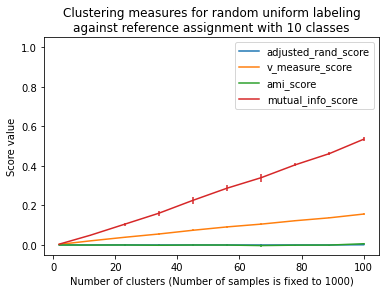

In [11]:
plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes = 10

plt.figure(2)

plots = []
names = []

for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names)
plt.show()

## Mutual Information Scores: [Normalized](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score), [Adjusted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)
- MI measures the agreement between a ground truth (```labels_true```) and a clustering algorithm assignment (```labels_pred```).
- Normalized MI is more often used. Adjusted MI is a more recent variant and is normalized against chance.

In [11]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_mutual_info_score(labels_true, labels_pred)  

0.29879245817089006

In [12]:
# permute 0,1 in predicted labels, rename 2 to 3, get same score
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)  

0.29879245817089006

In [13]:
# symmetric (swapping arguments doesn't change scoring)
metrics.adjusted_mutual_info_score(labels_pred, labels_true)  

0.29879245817089006

In [14]:
# perfect labeling
labels_pred = labels_true[:]

print(metrics.adjusted_mutual_info_score(labels_true, labels_pred),
      metrics.normalized_mutual_info_score(labels_true, labels_pred))


1.0 1.0


In [15]:
# not true for mutual info score - harder to judge
metrics.mutual_info_score(labels_true, labels_pred)  

0.6931471805599452

In [16]:
# bad (independent) label scoring
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

-0.16666666666666655

## Example: demostrate impact of #clusters, #samples on metrics
- non-adjusted measures (eg, V-measure) = dependent on #clusters, #samples
- adjusted measures (eg, ARI) = display random variations around mean = 0.0
- adjusted measures can be safely used as a consensus index to evaluate stability of clustering algos.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics

# Compute score for 2 random uniform cluster labelings.
# Both have the same number of clusters for each value possible value in ``n_clusters_range``.

# When fixed_n_classes is not None the first labeling is considered a ground
# truth class assignment with fixed number of classes.

def uniform_labelings_scores(score_func, 
                             n_samples, 
                             n_clusters_range,
                             fixed_n_classes=None, 
                             n_runs=5, 
                             seed=42):
    random_labels = np.random.RandomState(seed).randint
    scores        = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, 
                                 high=fixed_n_classes, 
                                 size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, 
                                         high=k, 
                                         size=n_samples)
            labels_b = random_labels(low=0, 
                                     high=k, 
                                     size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores


In [18]:
def ami_score(U, V):
    return metrics.adjusted_mutual_info_score(U, V)

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    ami_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.047s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.057s
Computing ami_score for 10 values of n_clusters and n_samples=100
done in 0.345s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.047s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.051s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.067s
Computing ami_score for 10 values of n_clusters and n_samples=1000
done in 0.237s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.057s


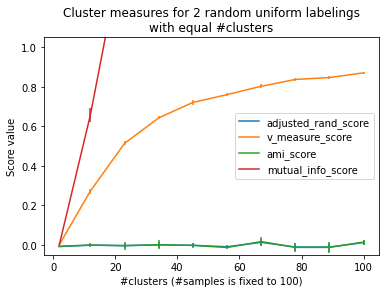

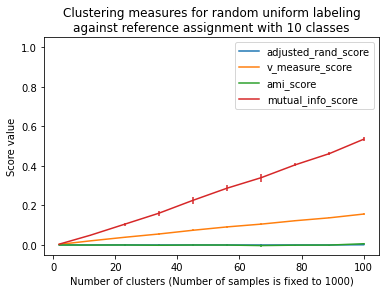

In [19]:
plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, 
                                      n_samples, 
                                      n_clusters_range)
    print("done in %0.3fs" % (time() - t0))

    plots.append(plt.errorbar(
        n_clusters_range, 
        np.median(scores, axis=1), 
        scores.std(axis=1))[0])
    
    names.append(score_func.__name__)

plt.title("Cluster measures for 2 random uniform labelings\n"
          "with equal #clusters")
plt.xlabel('#clusters (#samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)

# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples        = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes        = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, 
                                      n_samples, 
                                      n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    
    plots.append(plt.errorbar(
        n_clusters_range, 
        scores.mean(axis=1), 
        scores.std(axis=1))[0])
    
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names)
plt.show()

## [Homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score), [Completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score), [V-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
- If ground truth class assignments are known, it's possible to define metrics using conditional entropy analysis.
- *homogeneity*: each cluster contains only members of a single class. defined as $h = 1 - \frac{H(C|K)}{H(C)}$
- *completeness*: all members of a given class are assigned to the same cluster. defined as $c = 1 - \frac{H(K|C)}{H(K)}$
- *v-measure*: harmonic mean of 1),2)

- based on *conditional entropy*: $H(C|K) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{n_{c,k}}{n}
\cdot \log\left(\frac{n_{c,k}}{n_k}\right)$
- and *class entropy*: $H(C) = - \sum_{c=1}^{|C|} \frac{n_c}{n} \cdot \log\left(\frac{n_c}{n}\right)$

In [2]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(metrics.homogeneity_score( labels_true, labels_pred),
      metrics.completeness_score(labels_true, labels_pred),
      metrics.v_measure_score(   labels_true, labels_pred))

0.6666666666666669 0.420619835714305 0.5158037429793889


## [Fowlkes-Mallows Scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score)
- Can be used when ground truth assignements are known.
- Defined as $\text{FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}}$ (TP = true positives, FP = false positives, FN = false negatives)

In [12]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.fowlkes_mallows_score(labels_true, labels_pred)


0.4714045207910317

In [13]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.4714045207910317

In [14]:
labels_pred = labels_true[:]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

1.0

In [15]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.0

## [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
- Used when ground truth info is NOT known (scoring comes from model itself.)
- Higher scores = better cluster definitions.
- Defined as $s = \frac{b - a}{max(a, b)}$ (a = mean distance(sample, all other samples in same class), b = mean distance(sample, all other points in next nearest cluster))

In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

In [17]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels       = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

## [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) (aka Variance Ratio Criterion)
- Used when ground truth info is NOT known.
- Higher scores = better cluster definitions.
- Defined as ratio (sum of between-clusters dispersion, inter-cluster disperson), where dispersion = sum of squared distances

In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

In [19]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)

561.62775662962

## [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)
- Used when ground truth info is NOT known.
- Measures average similarity between clusters - measured by distance comparisons between clusters with the clusters' sizes. Zero = lowest possible = better partitions.

In [21]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
X      = datasets.load_iris().data
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

0.6619715465007511

## [Contingency Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html#sklearn.metrics.cluster.contingency_matrix)
- Returns *intersection cardinality* for every true/predicted cluster pair.
- Provides metric when samples are independent, identically distributed - one doesn't need to account for some instances not being clustered.

In [22]:
from sklearn.metrics.cluster import contingency_matrix
x = ["a", "a", "a", "b", "b", "b"]
y = [0, 0, 1, 1, 2, 2]
contingency_matrix(x, y)

# 1st row: three samples of true cluster being 'a' (two in c0, one in c1, none in c2)
# 2nd row: three samples of true cluster being 'b' (one in c1, two in c2)

array([[2, 1, 0],
       [0, 1, 2]])